<a href="https://colab.research.google.com/github/nipuni1313/CNN-for-image-classification/blob/main/Another_Test_of_Simple_CNN(not%20optimal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Create train, val, and test directories
train_dir = '/content/drive/MyDrive/realwaste/train/'
val_dir = '/content/drive/MyDrive/realwaste/validation/'
test_dir = '/content/drive/MyDrive/realwaste/test/'

# Path to your image dataset
dataset_path = '/content/drive/MyDrive/realwaste/realwaste-main/RealWaste/'

In [ ]:
!wget https://archive.ics.uci.edu/static/public/908/realwaste.zip


--2024-12-11 16:05:43--  https://archive.ics.uci.edu/static/public/908/realwaste.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘realwaste.zip’

realwaste.zip           [  <=>               ] 656.65M  9.36MB/s    in 62s     

2024-12-11 16:06:45 (10.7 MB/s) - ‘realwaste.zip’ saved [688545323]



In [ ]:
!unzip /content/realwaste.zip -d /content/dataset


Archive:  /content/realwaste.zip
797f4fca27a3a85e4c27131cdb7d9a9a5d72c494
   creating: /content/dataset/realwaste-main/
  inflating: /content/dataset/realwaste-main/README.md  
   creating: /content/dataset/realwaste-main/RealWaste/
   creating: /content/dataset/realwaste-main/RealWaste/Cardboard/
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_1.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_10.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_100.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_101.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_102.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_103.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_104.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_105.jpg  
  inflating: /content/da

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split


In [ ]:
dataset_path = '/content/dataset'
print(os.listdir(dataset_path))

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset'

In [ ]:
# Create train, val, and test directories
train_dir = '/content/drive/MyDrive/RealWasteDataset/train/'
val_dir = '/content/drive/MyDrive/RealWasteDataset/validation/'
test_dir = '/content/drive/MyDrive/RealWasteDataset/test/'

In [ ]:

# List all categories (assumes subfolders for each category)
categories = os.listdir(dataset_path)



for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

# Create directories for each category inside train, val, and test
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)


In [ ]:
# Split the dataset into train, validation, and test sets
for category in categories:
    category_path = os.path.join('/content/drive/MyDrive/realwaste/realwaste-main/RealWaste/', category)

    # Check if the category path exists and is a directory
    if os.path.isdir(category_path) and len(os.listdir(category_path)) > 0:
        images = os.listdir(category_path)

        # Split the data into 60% train, 20% validation, 20% test
        train_images, temp_images = train_test_split(images, test_size=0.4, random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

        # Create target category directories in train, val, and test directories if they don't exist
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        # Move files to respective directories
        for image in train_images:
            # Check if the image is already in the target directory
            target_path = os.path.join(train_dir, category, image)
            if not os.path.exists(target_path):  # Only move if the image doesn't exist
                shutil.move(os.path.join(category_path, image), target_path)

        for image in val_images:
            # Check if the image is already in the target directory
            target_path = os.path.join(val_dir, category, image)
            if not os.path.exists(target_path):  # Only move if the image doesn't exist
                shutil.move(os.path.join(category_path, image), target_path)

        for image in test_images:
            # Check if the image is already in the target directory
            target_path = os.path.join(test_dir, category, image)
            if not os.path.exists(target_path):  # Only move if the image doesn't exist
                shutil.move(os.path.join(category_path, image), target_path)

print("Dataset split into train, validation, and test directories.")

Dataset split into train, validation, and test directories.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for data augmentation (train only)
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=20,     # Random rotations
    width_shift_range=0.2, # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'    # Fill empty pixels
)

# For validation and test, we just rescale the images
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data using flow_from_directory
train_data = train_datagen.flow_from_directory(
    train_dir,  # Directory with training data
    target_size=(128, 128),    # Resize images
    batch_size=32,
    class_mode='sparse'  # Set to 'sparse' to get integer labels
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,  # Directory with validation data
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'  # Set to 'sparse' to get integer labels
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,  # Directory with test data
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'  # Set to 'sparse' to get integer labels
)


Found 2848 images belonging to 9 classes.
Found 950 images belonging to 9 classes.
Found 954 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(train_data.num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,  # Increase epochs as needed
    batch_size=32,
    callbacks=[lr_scheduler],
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,519,241 (24.87 MB)

 Trainable params: 6,518,793 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 744s 8s/step - accuracy: 0.2842 - loss: 2.8866 - val_accuracy: 0.0884 - val_loss: 6.8646 - learning_rate: 1.0000e-04
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4100 - loss: 1.6774 - val_accuracy: 0.0884 - val_loss: 11.6381 - learning_rate: 1.0000e-04
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.4287 - loss: 1.6265 - val_accuracy: 0.0895 - val_loss: 10.9461 - learning_rate: 1.0000e-04
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.4468 - loss: 1.4958 - val_accuracy: 0.1095 - val_loss: 7.7319 - learning_rate: 1.0000e-04
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.4702 - loss: 1.5209 - val_accuracy: 0.3811 - val_loss: 2.7698 - learning_rate: 1.0000e-04
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.5042 - loss: 1.4181 - val_accuracy: 0.5168 - val_loss: 1.3655 - learning_rate: 1.0000e-04
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.5054 - loss: 1

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_data, verbose=1)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Train Loss: {train_loss:.4f}")

# Generate predictions for the test set
y_pred = model.predict(test_data, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = test_data.classes  # True labels from test generator

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (Precision, Recall, F1-score for each class)
class_labels = list(test_data.class_indices.keys())  # Class labels
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:")
print(report)


30/30 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.6516 - loss: 1.0009
Test Accuracy: 64.99%
Test Loss: 1.0077
89/89 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.6831 - loss: 0.8914
Train Accuracy: 68.68%
Train Loss: 0.8623
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step
Confusion Matrix:
[[ 9 16  2 15  6  8 14  6 17]
 [ 8  5  3 18  4  9 17  7 12]
 [ 9  9  4 10  5  8 20  6 13]
 [17  9  9 23  9 19 40  6 26]
 [ 9 10 11 17  8 12 16  3 13]
 [ 8  5  6 17  7 11 25  3 18]
 [12 19 13 35 11 27 37 11 20]
 [ 4  4  8 16  4  4 12  3  9]
 [ 7  7  5 13  9 11 22  2 12]]
Classification Report:
                     precision    recall  f1-score   support

          Cardboard       0.11      0.10      0.10        93
      Food Organics       0.06      0.06      0.06        83
              Glass       0.07      0.05      0.06        84
              Metal       0.14      0.15      0.14       158
Miscellaneous Trash       0.13      0.08      0.10        99
              Paper       0.10      0.11      0

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6145 - loss: 1.0480 - val_accuracy: 0.5690 - val_loss: 1.3263
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6364 - val_loss: 1.4999
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6060 - loss: 1.0398 - val_accuracy: 0.6293 - val_loss: 1.0704
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5909 - val_loss: 1.1115
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.6283 - loss: 1.0215 - val_accuracy: 0.6390 - val_loss: 1.1447
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5909 - val_loss: 0.9370
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6504 - loss: 0.9624 - val_accuracy: 0.6196 - val_loss: 1.1285
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7727 - val_loss: 0.7428
Epoch 9/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6454 - loss: 0.9663 - val_acc

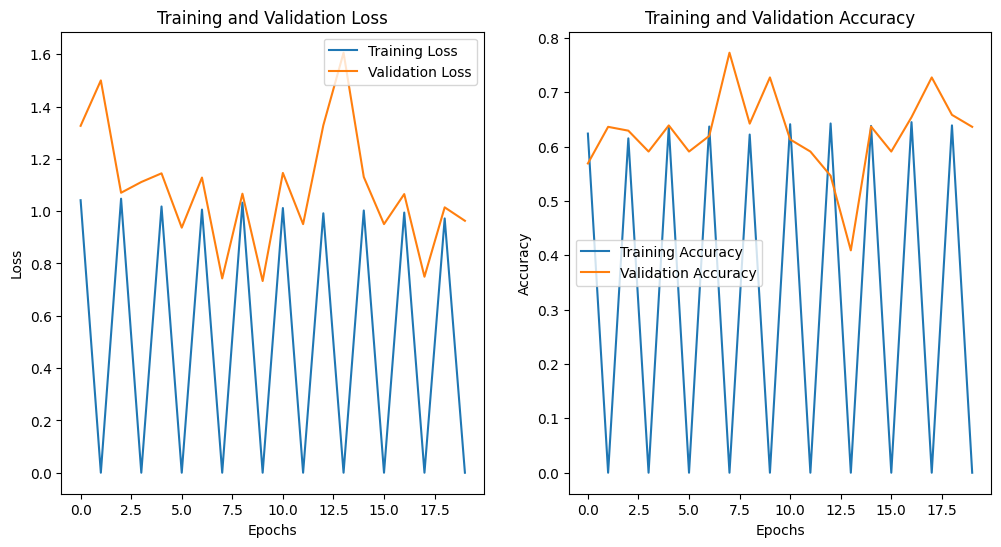

In [10]:
import matplotlib.pyplot as plt

history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=20,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()